# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
!pip install sklearn

In [94]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [95]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [96]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [97]:
# Convert categorical features to category type
categorical_cols = ['market_id','store_primary_category','order_protocol']
df_encoded = df

<Axes: xlabel='store_primary_category'>

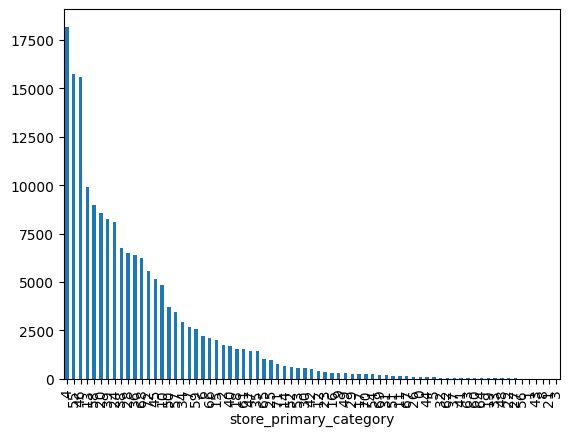

In [24]:
df['store_primary_category'].value_counts().plot.bar()

In [27]:
top_n = 10
top_categories = df['store_primary_category'].value_counts().nlargest(top_n).index
df_encoded['store_primary_category'] = df_encoded['store_primary_category'].apply(
    lambda x: x if x in top_categories else 'Other'
)

In [98]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

In [106]:
df_encoded.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'store_primary_category_1', 'store_primary_category_2',
       'store_primary_category_3', 'store_primary_category_4',
       'store_primary_category_5', 'store_primary_category_6',
       'store_primary_category_7', 'store_primary_category_8',
       'store_primary_category_9', 'store_primary_category_10',
       'store_primary_category_11', 'store_primary_category_12',
       'store_primary_category_13', 'store_primary_category_14',
       'store_primary_category_15', 'store_primary_category_16',
       'store_primary_category_17', 'store_primary_category_18',
       'store_primary_category_19', 'store_primary_category_20',
       'store_primary_category_21', 'store_primary_category_22',
       's

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [100]:
# Calculate time taken in minutes
df_encoded['time_taken'] = (df_encoded['actual_delivery_time'] - df_encoded['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [101]:
# Extract the hour and day of week from the 'created_at' timestamp
df_encoded['order_hour'] = df_encoded['created_at'].dt.hour
df_encoded['order_dayofweek'] = df_encoded['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df_encoded['isWeekend'] = df_encoded['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [102]:
# Drop unnecessary columns
df_encoded.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [103]:
# Bin order_hour into 4 time slots
def bin_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_encoded['order_time_bin'] = df_encoded['order_hour'].apply(bin_hour)
df_encoded = pd.get_dummies(df_encoded, columns=['order_time_bin'], drop_first=True)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [104]:
# Define target variable (y) and features (X)
y = df_encoded['time_taken']
X = df_encoded.drop(columns=['time_taken'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [105]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance']

categorical_cols = ['market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'store_primary_category_13', 'store_primary_category_20',
       'store_primary_category_24', 'store_primary_category_28',
       'store_primary_category_38', 'store_primary_category_39',
       'store_primary_category_46', 'store_primary_category_55',
       'store_primary_category_58', 'store_primary_category_Other',
       'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0',
       'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0','order_dayofweek', 'isWeekend', 'order_hour'
       'order_time_bin_Evening', 'order_time_bin_Morning', 'order_time_bin_Night']

In [ ]:
X_train = X_train.drop(columns = ['order_dayofweek','order_hour'])  # ,'total_onshift_dashers','total_busy_dashers'
y_train = y_train.drop(columns = ['order_dayofweek','order_hour'])
X_test = X_test.drop(columns = ['order_dayofweek','order_hour'])
y_test = y_test.drop(columns = ['order_dayofweek','order_hour'])

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X_train[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    X_train[col].value_counts().plot.bar()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: >

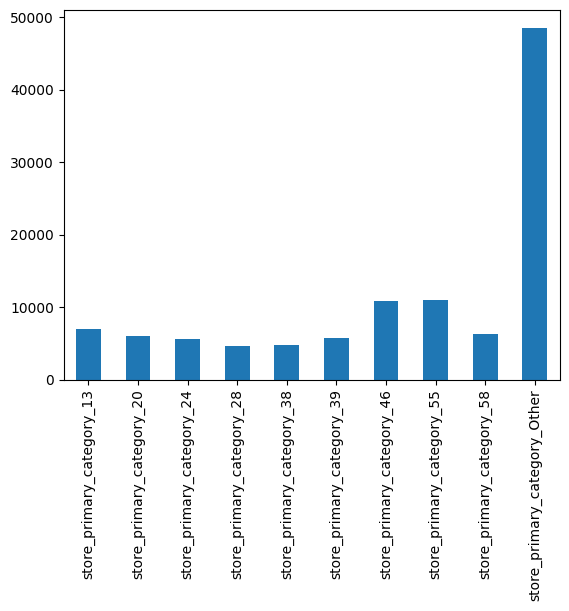

In [54]:
X_train[[col for col in X_train.columns if 'store_primary_category' in col]].sum().plot(kind='bar')

<Axes: >

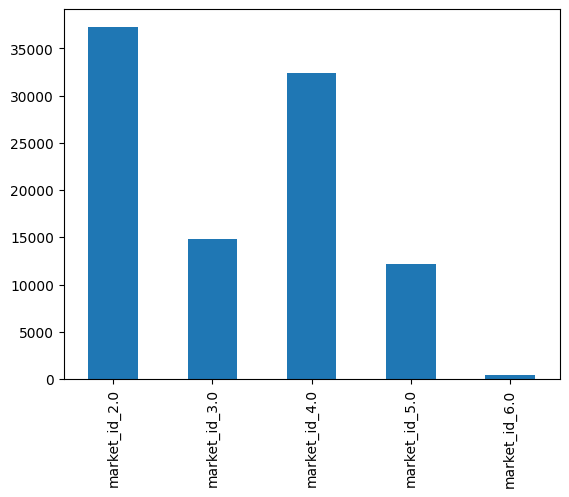

In [55]:
X_train[[col for col in X_train.columns if 'market_id' in col]].sum().plot(kind='bar')

<Axes: >

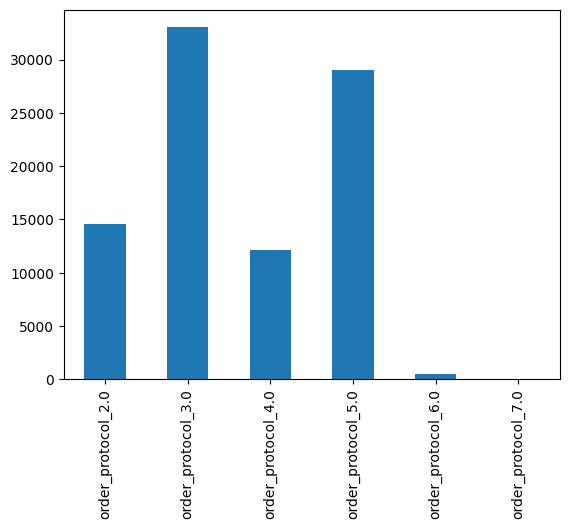

In [56]:
X_train[[col for col in X_train.columns if 'order_protocol' in col]].sum().plot(kind='bar')

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

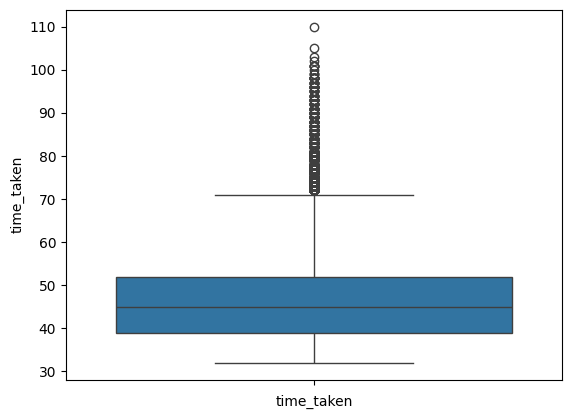

In [111]:
# Distribution of time_taken
sns.boxplot(y)
plt.xlabel('time_taken')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

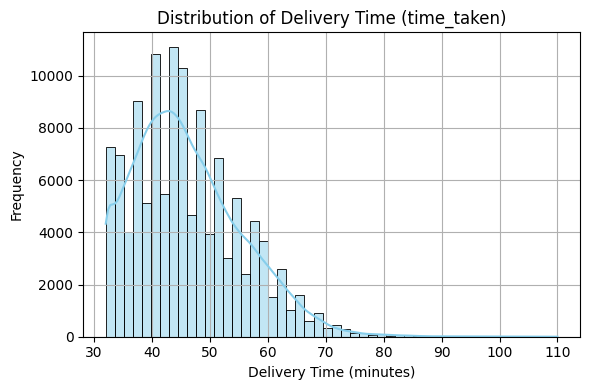

In [112]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Delivery Time (time_taken)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


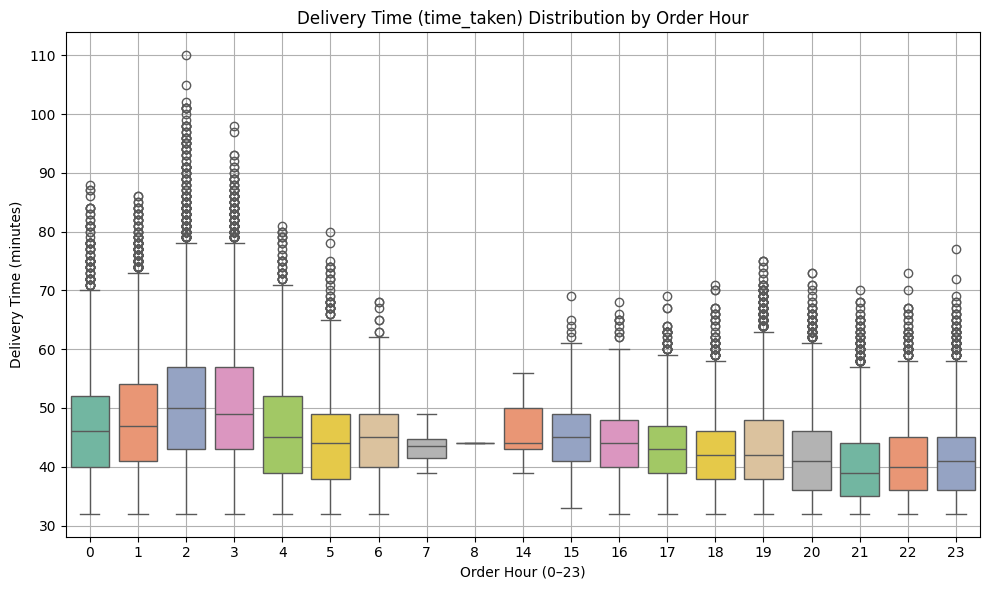

In [58]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='Set2')
plt.title("Delivery Time (time_taken) Distribution by Order Hour")
plt.xlabel("Order Hour (0–23)")
plt.ylabel("Delivery Time (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

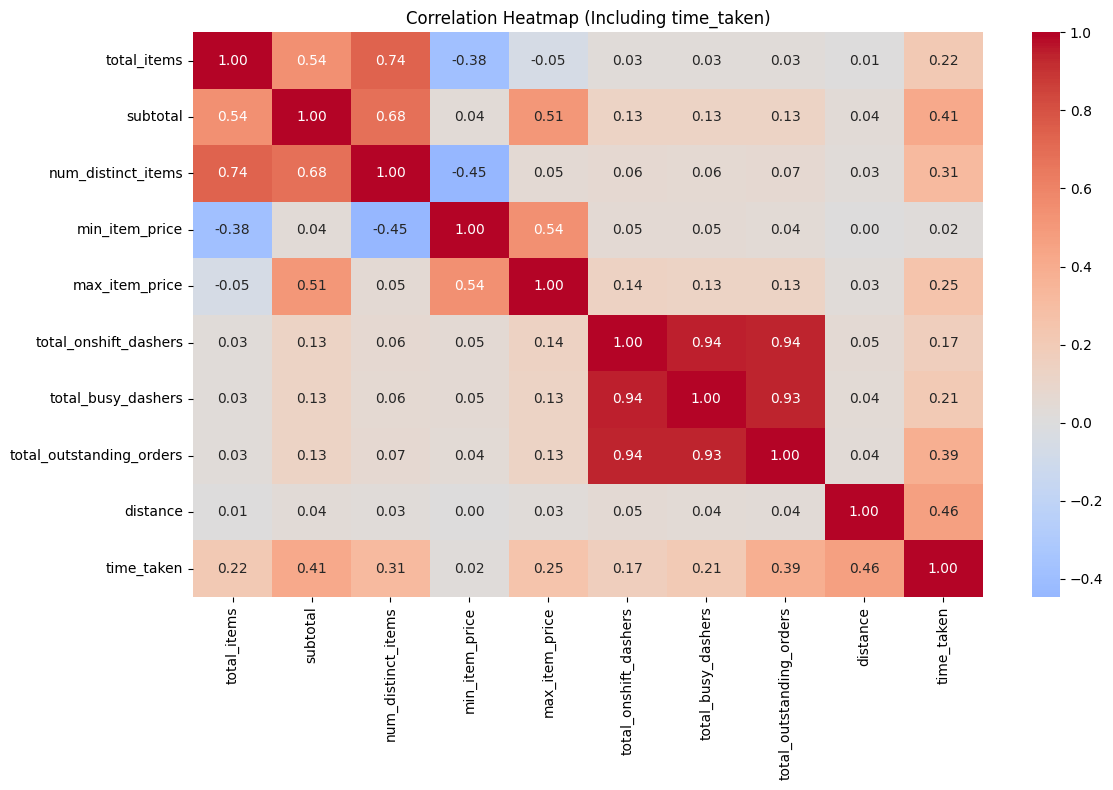

In [113]:
# Plot the heatmap of the correlation matrix
corr_df = X_train[numerical_cols]
corr_df['time_taken'] = y_train
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Including time_taken)")
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
X_train = X_train.drop(columns = ['min_item_price'])  # ,'total_onshift_dashers','total_busy_dashers'
y_train = y_train.drop(columns = ['min_item_price'])
X_test = X_test.drop(columns = ['min_item_price'])
y_test = y_test.drop(columns = ['min_item_price'])

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

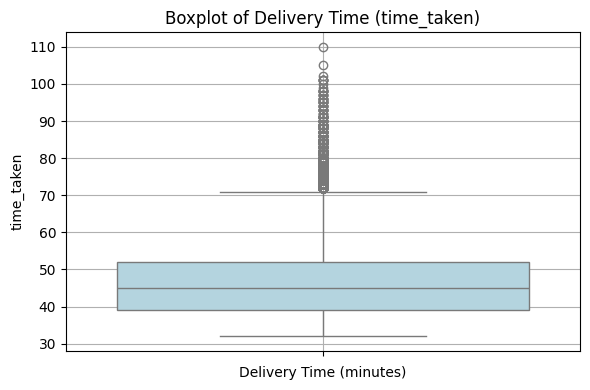

In [63]:
plt.figure(figsize=(6, 4))
sns.boxplot(y_train, color='lightblue')
plt.title("Boxplot of Delivery Time (time_taken)")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [115]:
# Handle outliers

q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Outliers: < {lower_bound:.2f} or > {upper_bound:.2f}")

Outliers: < 19.50 or > 71.50


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [116]:
# Import libraries

# Modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Statsmodels for inference
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [117]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

selected_num_cols = ['total_items', 'subtotal', 'num_distinct_items',
                     'max_item_price','total_outstanding_orders', 'distance'
                     ,'total_onshift_dashers','total_busy_dashers']

X_train[selected_num_cols] =  scaler.fit_transform(X_train[selected_num_cols])
X_test[selected_num_cols] = scaler.transform(X_test[selected_num_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [118]:
# Create/Initialise the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [125]:
# Train the model using the training data
lr.fit(X_train,y_train)

LinearRegression()

In [126]:
# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [127]:
# Find results for evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

mse = mean_squared_error(y_test, y_test_pred)
print("Test RMSE:", np.sqrt(mse))

Train R²: 0.882982514188765
Test R²: 0.8823205199449987
Test RMSE: 3.2060350070442523


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

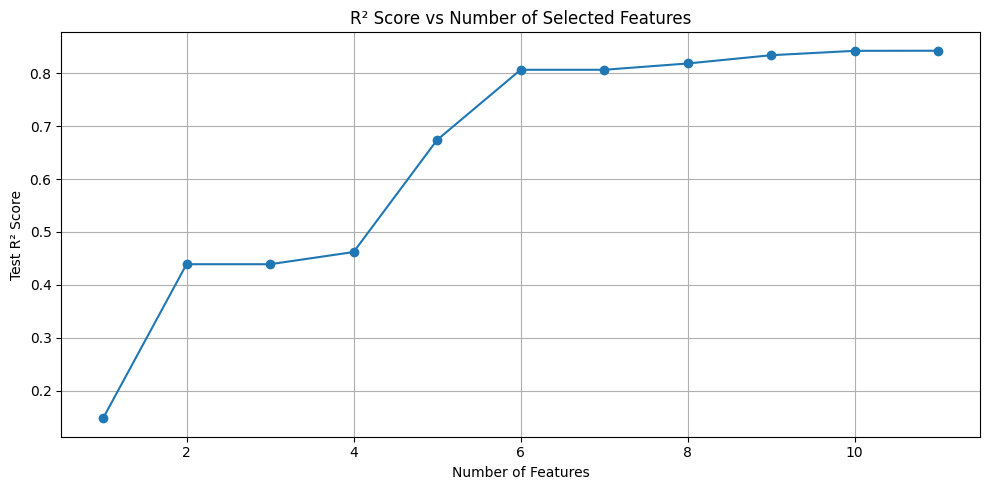

In [ ]:
# Loop through the number of features and test the model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

num_features_list = list(range(1, 12))  # Try models with 1 to 11 features
r2_scores = []

for n_features in num_features_list:
    lr = LinearRegression()                          # Base model
    rfe = RFE(lr, n_features_to_select=n_features)   # Wrap model in RFE
    rfe.fit(X_train, y_train)                        # Fit to training data

    y_pred = rfe.predict(X_test)                     # Predict on test set
    r2 = r2_score(y_test, y_pred)                    # Evaluate performance
    r2_scores.append(r2)                             # Store R² for comparison

plt.figure(figsize=(10, 5))
plt.plot(num_features_list, r2_scores, marker='o')
plt.title("R² Score vs Number of Selected Features")
plt.xlabel("Number of Features")
plt.ylabel("Test R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
# Build the final model with selected number of features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

rfe_final = RFE(LinearRegression(), n_features_to_select=6)
rfe_final.fit(X_train, y_train)

selected_features = X_train.columns[rfe_final.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'store_primary_category_3']


In [130]:
y_train_pred = rfe_final.predict(X_train)
y_test_pred = rfe_final.predict(X_test)

In [131]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

mse = mean_squared_error(y_test, y_test_pred)
print("Test RMSE:", np.sqrt(mse))

Train R²: 0.8056521998254237
Test R²: 0.8066046070429358
Test RMSE: 4.109991765878045


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

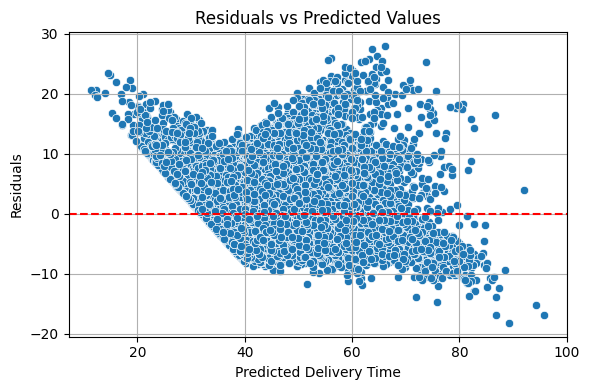

In [132]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Delivery Time")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

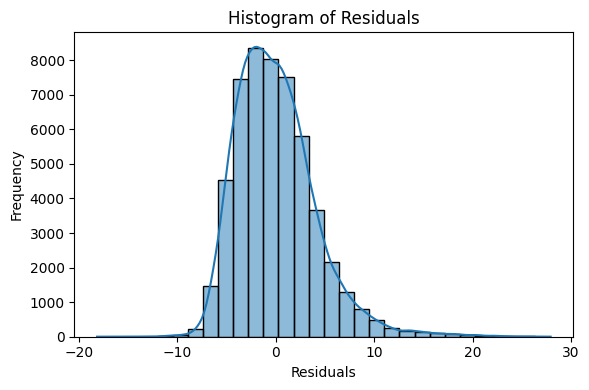

In [133]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

[Your inferences here:]

So we can see in the above two plots:

1) The residuals are not evenly distributed around zero, except there is a funnel shape - that is narrow for lower delivery times and it gets wider later, This is a sign of heteroscedasticity — the variance of errors increases with prediction magnitude.

2) The histogram plot shows that the residuals are normally distributed with peak a bit left of zero and also it has a slight right skew.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [134]:
# Compare the scaled vs unscaled features used in the final model
# Get the final model inside RFE
final_model = rfe_final.estimator_

# Coefficients and intercept
coef_scaled = final_model.coef_
intercept = final_model.intercept_

features = selected_features  

# Combine into a dataframe
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient (scaled)': coef_scaled
})
coef_df


,Feature,Coefficient (scaled)
0,subtotal,3.438563
1,total_onshift_dashers,-12.109860
2,total_busy_dashers,-4.756545
3,total_outstanding_orders,18.751106
4,distance,4.178832
5,store_primary_category_3,7.293929


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes,There are several categorical feautures, But one of them made it to selected feautures, the store_primary_category_3, the store_primary_category 3 takes longer delivery time according to analysis.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> If test_size = 0.2, that means 20 percent of data will be used as a validation set, this will not be used for standardizing, EDA or model training



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> 'Distance' has highest corr with time_taken



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> we did a boxplot to first visualize the outliers, then we drop all the outliers which is 1.5 times std dev away from IQR



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the model coefficients, the top three features affecting delivery time are:

subtotal, total_onshift_dashers, and total_busy_dashers are the most important 3 features



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression is a supervised learning algorithm used for predicting a continuous output based on one or more input features.

It models the relationship between the independent variables (X) and the dependent variable (y) by fitting a linear equation to the data.

A best fit line is to be found, that is the coefficients of features need to be found, this is done using gradient descent.

The cost-function used in LR is mean of square of residues, This function tells us how well the line fits the data points, minimizing this cost-function will give the best-fit line. To minimize it computationally, gradient decent algorithm is used, which works as follows:

1)The weights are initialized with random value
2)The cost function is calculated, Also we find the the derivatives of cost functions with respect to the weights
3)The weights are updated as follows w' = w - alpha* d  where d is the deivative of cost function wrt w and alpha is learning rate




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple LR has only one independent feature while multiple LR can have many.

The underlying assumptions remain sam, except a few additional assumptions are required for multiple LR, that there should be no multicollinearity between feautures.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost-function used in LR is mean of square of residues, This function tells us how well the line fits the data points, minimizing this cost-function will give the best-fit line. To minimize it computationally, gradient decent algorithm is used, which works as follows:
The weights are initialized with random value
The cost function is calculated, Also we find the the derivatives of cost functions with respect to the weights
the weights are updated as follows w' = w - alpha* d  where d is the deivative of cost function wrt w and alpha is learning rate




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting is when a model memorizes the training data, In technical terms, it takes advantage of increased complexity to forcefully reduce the cost function, this results in model not generalizing well, and the acuracy drops while trying to predict unseen data
 Underfitting is when the model is to simple to capture the pattern.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Linear regression needs certain assumptions to be valid, They are:
 1) The residuals should add upto zero, that is if we plot the residuals, they should be approx balanced arounf the zero line
 2) The variance should not increase or decrease with the features, this also can be confirmed using a plot